# Вывод изображения

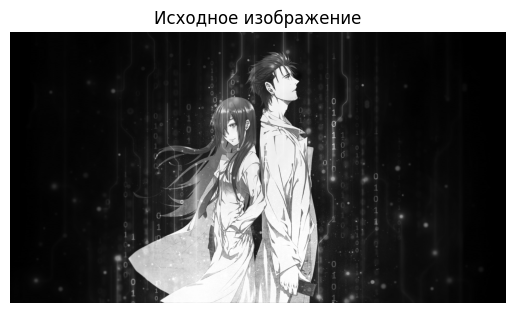

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

# Прямое и обратное косинусное преобразование (DCT)

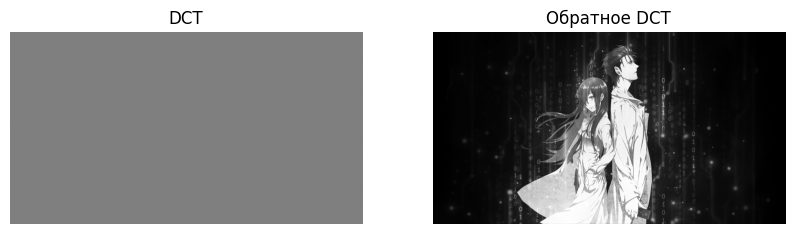

In [6]:
dct_img = dct(dct(img.T, norm='ortho').T, norm='ortho')
idct_img = idct(idct(dct_img.T, norm='ortho').T, norm='ortho')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(dct_img, cmap='gray')
plt.title('DCT')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(idct_img, cmap='gray')
plt.title('Обратное DCT')
plt.axis('off')
plt.show()


# Прямое и обратное преобразование Фурье

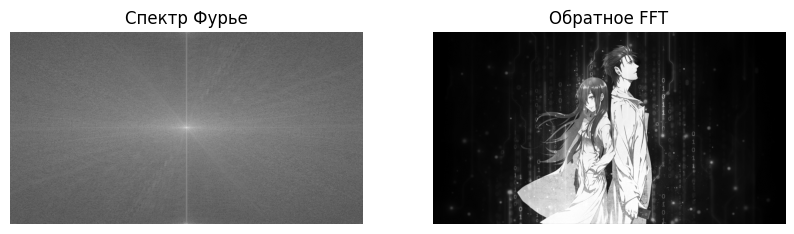

In [7]:
fft_img = np.fft.fft2(img)
fft_shift = np.fft.fftshift(fft_img)
magnitude_spectrum = 20*np.log(np.abs(fft_shift)+1)

ifft_img = np.fft.ifft2(fft_img).real

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр Фурье')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ifft_img, cmap='gray')
plt.title('Обратное FFT')
plt.axis('off')
plt.show()


# Коэффициент корреляции с исходным изображением

In [8]:
def correlation_coefficient(img1, img2):
    img1 = img1.flatten()
    img2 = img2.flatten()
    return np.corrcoef(img1, img2)[0,1]

corr_dct = correlation_coefficient(img, idct_img)
corr_fft = correlation_coefficient(img, ifft_img)
print(f"Корреляция DCT: {corr_dct:.4f}")
print(f"Корреляция FFT: {corr_fft:.4f}")


Корреляция DCT: 1.0000
Корреляция FFT: 1.0000


# Определяем, что ближе к оригиналу

In [9]:
if corr_dct > corr_fft:
    print("DCT ближе к оригиналу")
else:
    print("FFT ближе к оригиналу")

FFT ближе к оригиналу


# График зависимости спектра яркости от частоты

In [ ]:
frequencies = np.fft.fftfreq(img.shape[0])
plt.plot(frequencies, np.mean(np.abs(fft_img), axis=0))
plt.title("Зависимость спектра яркости от частоты")
plt.xlabel("Частота")
plt.ylabel("Средняя яркость")
plt.show()
